In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from category_encoders import OneHotEncoder

# Write a Wrangle Function for the Dataset 

**Let's create our Wrangle Function**

In [11]:
def wrangle(filepath):
    # Read data into filepath
    df = pd.read_csv(filepath)
    # Using 'for loop' to estimate 'mean_price_cols' from 'min_price' & 'max_price'
    price_cols = df[["min_price", "max_price"]]
    mean_values = []
    for index, row in price_cols.iterrows():
        mean_value = row.mean()
        mean_values.append(mean_value)
    df["mean_price_cols"] = mean_price_cols
    # Drop columns with too many cardinality
    df.drop(columns=["commodity", "arrival_date"], inplace=True)
    # Drop leaky columns
    df.drop(columns=["min_price", "max_price", "modal_price"], inplace=True)
    # Let's reomve other irrelevant features that will not contribute to our model
    df.drop(columns=["state", "market", "district"], inplace=True)
  

    return df

**Using wrangle Function to read file into DataFrame**

In [12]:
filepath = "Rice_2021.csv"
df = wrangle(filepath)
df.head()

,variety,mean_price_cols
0,Coarse,4250.0
1,Coarse,4150.0
2,Coarse,4150.0
3,Coarse,4150.0
4,Coarse,4150.0


**Check the dataset information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68251 entries, 0 to 68250
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         68251 non-null  object
 1   district      68251 non-null  object
 2   market        68251 non-null  object
 3   commodity     68251 non-null  object
 4   variety       68251 non-null  object
 5   arrival_date  68251 non-null  object
 6   min_price     68251 non-null  int64 
 7   max_price     68251 non-null  int64 
 8   modal_price   68251 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


**Use for loop to Iterate through the rows and calculate mean_price from "min_price" & "max_price" of Rice**

**First create a Dataframe for the "min_price" & "max_price" columns assign to variable "price_cols"**

In [9]:
price_cols = df[["min_price", "max_price"]]
price_cols[:5]

,min_price,max_price
0,4000,4500
1,3900,4400
2,3900,4400
3,3900,4400
4,3900,4400


**Now, use "for loop" to iterate through the rows to calculate our "mean_price_cols"**

In [5]:
price_cols = df[["min_price", "max_price"]]
mean_price_cols = []
for index, row in price_cols.iterrows():
    mean_value = row.mean()
    mean_price_cols.append(mean_value)


**Let's check to confirm that the "for loop" is working**  

In [7]:
df["mean_price_cols"] = mean_price_cols
df["mean_price_cols"].head()

0    4250.0
1    4150.0
2    4150.0
3    4150.0
4    4150.0
Name: mean_price_cols, dtype: float64

**Let's drop too high cardinality columns and add to the wrangle function up above**

In [8]:
df.drop(columns=["commodity", "arrival_date"], inplace=True)

**Let's drop leaky columns from the DataFrame and add to the wrangle function up above**

In [9]:
df.drop(columns=["min_price", "max_price", "modal_price"], inplace=True)

In [10]:
df.drop(columns=["state", "market", "district"], inplace=True)

# Explore the Dataset

**Let's see the relationship between the "mean_price_cols" & "state" columns**

In [20]:
mean_price_by_state = df.groupby("state")["mean_price_cols"].mean().sort_values(ascending=False)
mean_price_by_state

state
Manipur          4454.545455
Gujarat          4049.538934
Karnataka        3414.696730
Kerala           3408.766626
Maharashtra      3101.341823
Tripura          3011.607430
Odisha           2873.026063
West Bengal      2829.280098
Uttar Pradesh    2477.944980
Jharkhand        2420.204604
Telangana        2261.111111
Name: mean_price_cols, dtype: float64

**Let's create a bar chart to visualize price of Rice by state**

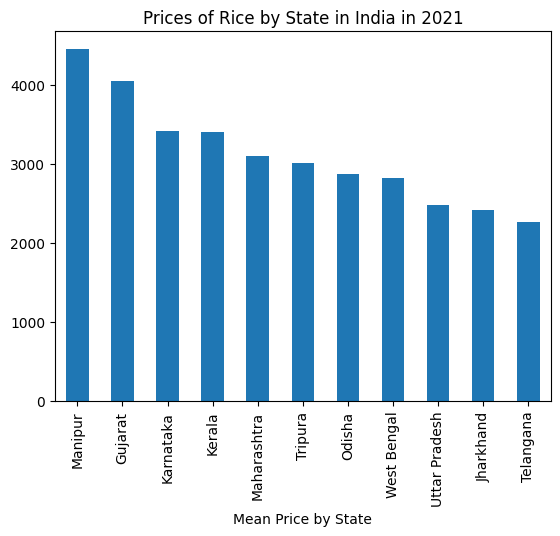

In [30]:
mean_price_by_state.plot(kind="bar", xlabel= "Mean Price by State", y= "State")
plt.title("Prices of Rice by State in India in 2021");

**Let's see the relationship between the "mean_price_cols" & top 10 varieties**

In [26]:
mean_price_by_variety = df.groupby("variety")["mean_price_cols"].mean().sort_values(ascending=False).head(10)
mean_price_by_variety

variety
Basumathi                  10472.727273
Fine(Basmati)               6099.271654
Basmati U.P. (New)          6054.166667
CR 1009 (Coarse) Boiled     4699.783550
Super Fine                  4163.105263
Hamsa St.                   3991.666667
Sona Fine                   3850.000000
Mataa Parboiled             3848.339483
Medium                      3755.525000
Sona                        3468.564815
Name: mean_price_cols, dtype: float64

**Let's visualize the top 10 most selling varieties of Rice in India**

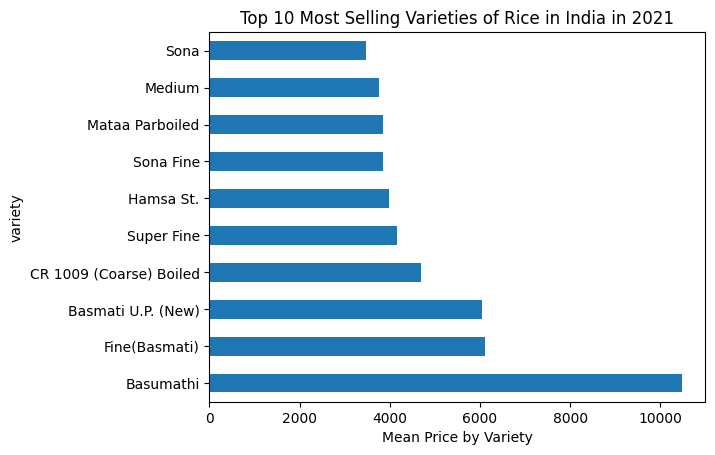

In [28]:
mean_price_by_variety.plot(kind="barh", xlabel="Mean Price by Variety", y="Variety");
plt.title("Top 10 Most Selling Varieties of Rice in India in 2021");

**Indeed Basumathi varieties are the best-selling Rice with the most high price in India. Known for their long grains, distinct aroma, and delicious flavor.**

**Let's see the relationship between the "mean_price_cols" & "market" columns** 

In [32]:
mean_price_by_market = df.groupby("market")["mean_price_cols"].mean().sort_values(ascending=False).head(10)
mean_price_by_market

market
Kalimpong              8037.037037
Pune                   5866.666667
Ramanagara             5692.500000
Mumbai                 5427.777778
Bhadravathi            5300.000000
Aroor                  5237.248322
Kolar                  5114.393939
Karjat                 4949.170124
Karsiyang(Matigara)    4917.548077
Gokak                  4808.000000
Name: mean_price_cols, dtype: float64

**Let's Visualize the top 10 Markets with most sales of Rice in India in 2021**

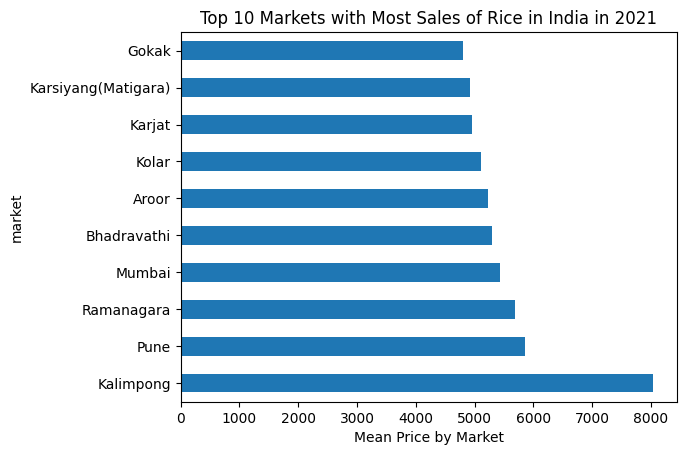

In [33]:
mean_price_by_market.plot(kind="barh", xlabel="Mean Price by Market", y="Market")
plt.title("Top 10 Markets with Most Sales of Rice in India in 2021");

**Kalimpong Market Located in West Bengal has most high price of Rice in 2021**

**Let's see the relationship between the "mean_price_cols" & "district" columns**

In [34]:
mean_price_by_district = df.groupby("district")["mean_price_cols"].mean().sort_values(ascending=False).head(10)
mean_price_by_district

district
Mumbai               5427.777778
Alappuzha            5237.248322
Belgaum              4808.000000
Bangalore            4563.461538
Ahmednagar           4543.540000
Mysore               4525.951389
Imphal East          4500.000000
Imphal West          4500.000000
Gautam Budh Nagar    4478.826923
Thoubal              4400.000000
Name: mean_price_cols, dtype: float64

**Let's Visualize the top 10 Districts where price of Rice is most in India in 2021**

Text(0.5, 1.0, 'Top 10 Districts Where Prices of Rice are Mostly High in India in 2021')

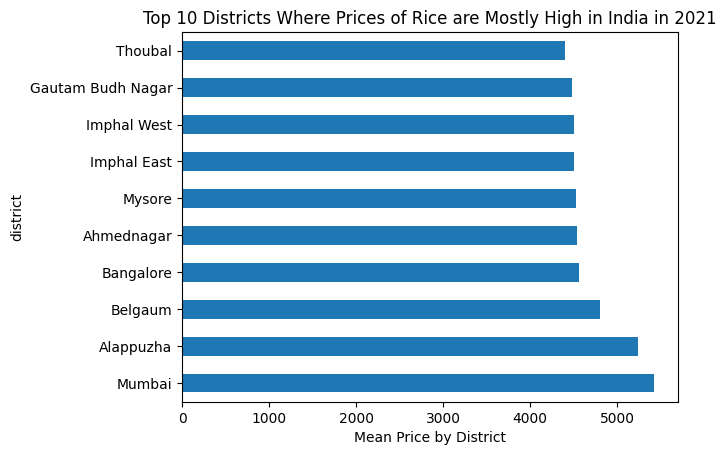

In [35]:
mean_price_by_district.plot(kind="barh", xlabel="Mean Price by District", y="District")
plt.title("Top 10 Districts Where Prices of Rice are Mostly High in India in 2021")

**Rice in Mumbai District was most expensive in 2021 in India**

**Distribution of rice across States in Inia**

In [16]:
var_dist = df["variety"].value_counts().sort_values(ascending=False).head(10)
var_dist

variety
III                       26292
Other                     10720
Common                     9864
Fine                       9532
Coarse                     3468
Masuri                     1318
Ratnachudi (718 5-749)     1064
1009 Kar                   1014
Medium                      740
Broken Rice                 655
Name: count, dtype: int64

**Plot bar chart to visualize distribution of rice**

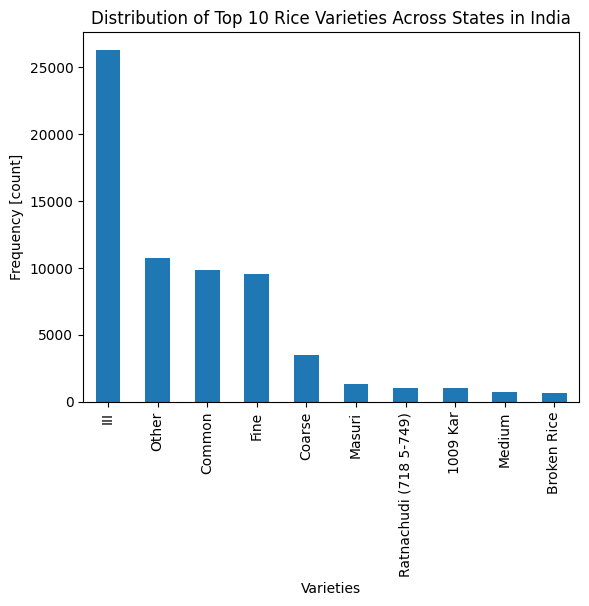

In [24]:
var_dist.plot(kind="bar")
plt.xlabel("Varieties"),
plt.ylabel("Frequency [count]"),
plt.title("Distribution of Top 10 Rice Varieties Across States in India");

# Let's Build a Model to Predict Prices of Rice Varieties

**Let's split our data into 'Feature Matrix' and 'Target Vector'**

In [26]:
target = "mean_price_cols"
X = df.drop(columns = target)
y = df[target]

print("X shape", X.shape)
print("y shape", y.shape)

X shape (68251, 1)
y shape (68251,)


**Let's split dataset into training and testing sets**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: shape ", X_train.shape)
print("X_test: shape ", X_test.shape)
print("y_train: shape ", y_train.shape)
print("X_test: shape ", X_test.shape)

X_train: shape  (54600, 1)
X_test: shape  (13651, 1)
y_train: shape  (54600,)
X_test: shape  (13651, 1)


**Create and train 'DecisionTreeRegression' Model**

In [53]:
model = make_pipeline(OneHotEncoder(use_cat_names=True), DecisionTreeRegressor(random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['variety'], use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

**Let's make predictions from the test set**

In [54]:
y_pred = model.predict(X_test)
y_pred[:5]

array([2455.69782547, 3083.71901752, 2068.69024857, 3460.07882883,
       3020.57750495])

**Evaluate the Model to check its performance**

In [55]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Square Error: {mse}")

Mean Square Error: 230836.0644165543


**Compute Mean of Target Variable**

In [56]:
mean_target = np.mean(y_train)
print(round(mean_target, 2))

2733.06


**Generate baseline predictions**

In [57]:
baseline_pred = np.full_like(y_test, mean_target, dtype=np.float64)
baseline_pred[:5]

array([2733.05799451, 2733.05799451, 2733.05799451, 2733.05799451,
       2733.05799451])

**Compute the Mean Squared Error (MSE) of the Baseline Model**

In [58]:
baseline_mse = mean_squared_error(y_test, baseline_pred)

print(f"Baseline Model MSE: ({baseline_mse})")

Baseline Model MSE: (435429.8102751374)


**Comment on the Model Performance**

In [51]:
print(f"""Comparing the Model MSE {mse} with the MSE of the baseline Model {baseline_mse}, there is significant
difference between the two values. Baseline Model MSE far greater than the Model MSE, this shows that the 
model performed really well.""")

Comparing the Model MSE 230836.0644165543 with the MSE of the baseline Model 435429.8102751374, there is significant
difference between the two values. Baseline Model MSE far greater than the Model MSE, this shows that the 
model performed really well.


**Let's get Feature Importances from the model**

In [60]:
features = model.named_steps["onehotencoder"].get_feature_names()
features[:5]

array(['variety_Coarse', 'variety_III', 'variety_Broken Rice',
       'variety_Other', 'variety_Masuri'], dtype=object)

In [62]:
importances = model.named_steps["decisiontreeregressor"].feature_importances_
importances[:5]

array([5.79705247e-02, 2.44410556e-01, 4.79903028e-02, 3.53497409e-03,
       2.40510792e-05])

# Communicate result with bar chart 

In [67]:
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_imp

variety_III                        0.244411
variety_Fine(Basmati)              0.189278
variety_Basumathi                  0.186570
variety_Common                     0.134126
variety_Coarse                     0.057971
variety_Broken Rice                0.047990
variety_CR 1009 (Coarse) Boiled    0.044098
variety_Medium                     0.026474
variety_Super Fine                 0.018489
variety_Mataa Parboiled            0.013614
dtype: float64

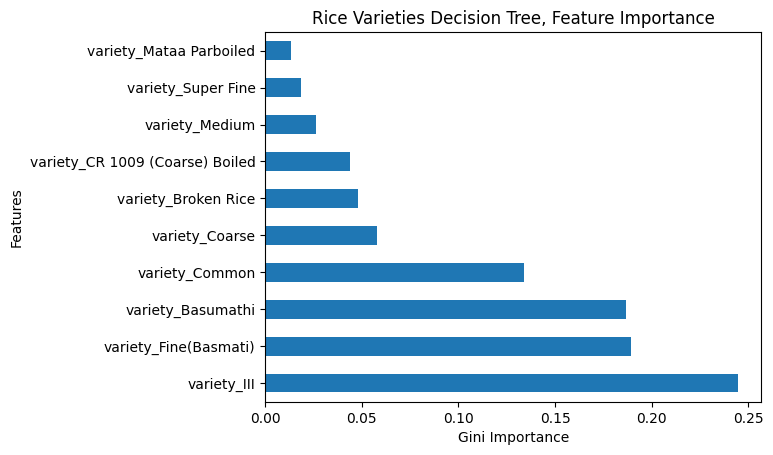

In [69]:
feat_imp.plot(kind="barh"),
plt.xlabel("Gini Importance"),
plt.ylabel("Features"),
plt.title("Rice Varieties Decision Tree, Feature Importance");

In [71]:
print(f"""The varieties of rice categorize under III has influence on prices of rice because of their 
enormous distribution. And the Basmati varieties definitely influence prices of rice because of the fact that
they are generally known for their long grains, distinct aroma, and delicious flavor""")

The varieties of rice categorize under III has influence on prices of rice because of their 
enormous distribution. And the Basmati varieties definitely influence prices of rice because of the fact that
they are generally known for their long grains, distinct aroma, and delicious flavor
